In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [2]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [3]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.
    
    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')
    
    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
    
    # TODO: Apply label encoding to categorical columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le
    
    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
               'housing', 'loan', 'default']
    X = df[features]# TODO: Select features
    
    # TODO: Scale the features
    scaler = StandardScaler() # TODO: Apply StandardScaler
    X_scaled = scaler.fit_transform(X)
    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

Data shape: (45211, 9)


In [4]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[indices]
        return centroids

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels


    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            points = X[labels == i]
            if len(points) > 0:
                new_centroids[i] = points.mean(axis=0)
            else:
                new_centroids[i] = X[np.random.randint(0, X.shape[0])]
        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)
        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.allclose(self.centroids, new_centroids, atol=1e-6):
                break
            self.centroids = new_centroids
        self.labels = self._assign_clusters(X)
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

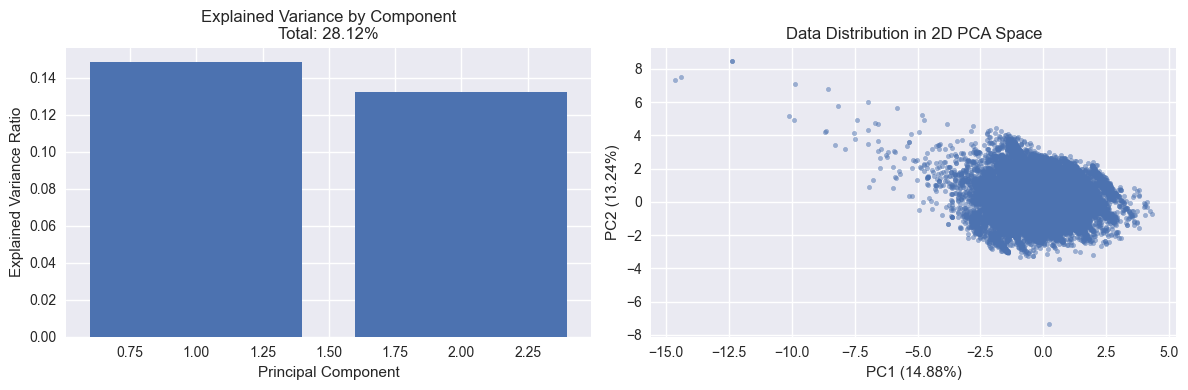

Shape after PCA: (45211, 2)


In [5]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.
    
    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # TODO: Create visualization
    plt.figure(figsize=(12, 4))
    
    # Plot explained variance
    # Your code here
    plt.subplot(1, 2, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'Explained Variance by Component\nTotal: {pca.explained_variance_ratio_.sum():.2%}')
    
    # Plot data in 2D
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
    plt.title('Data Distribution in 2D PCA Space')
    
    plt.tight_layout()
    plt.show()
    
    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

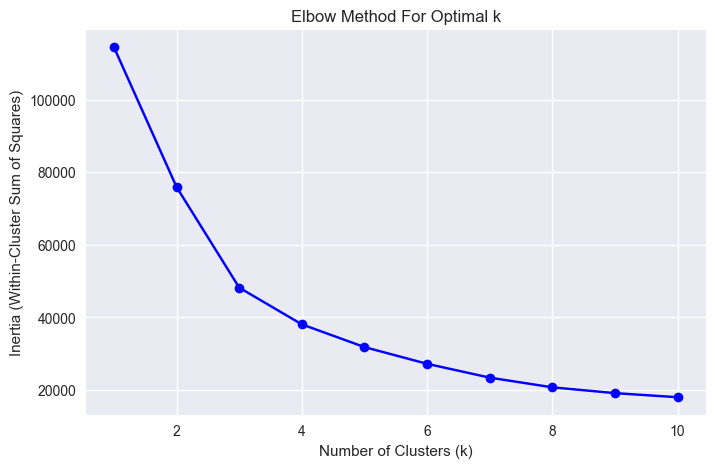

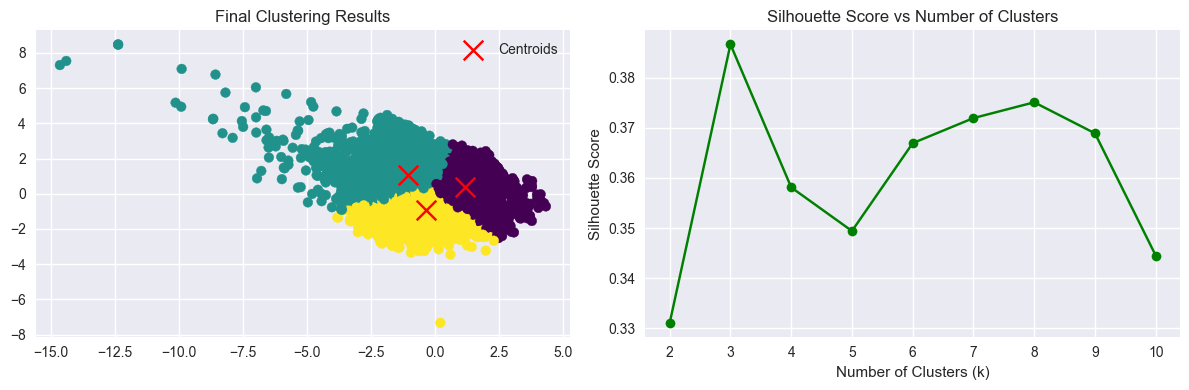


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [6]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).
    
    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    # Calculate distances between points and their assigned centroids
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
            inertia += np.sum(distances ** 2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.
    
    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    K = range(1, max_k + 1)
    
    # Calculate inertia for different k values
    # Your code here
    for k in K:
        kmeans = KMeansClustering(n_clusters=k)
        kmeans.fit(X)
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        inertias.append(inertia)
    
    # Create elbow plot
    # Your code here
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.title('Elbow Method For Optimal k')
    plt.grid(True)
    plt.show()
    
    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on elbow curve
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results')
plt.legend()

# Plot evaluation metrics
plt.subplot(1, 2, 2)
# Your code here: Add relevant evaluation metric plots
silhouette_vals = []
K_range = range(2, 11)
for k in K_range:
    km = KMeansClustering(n_clusters=k)
    km.fit(X_pca)
    score = silhouette_score(X_pca, km.labels)
    silhouette_vals.append(score)

plt.plot(K_range, silhouette_vals, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

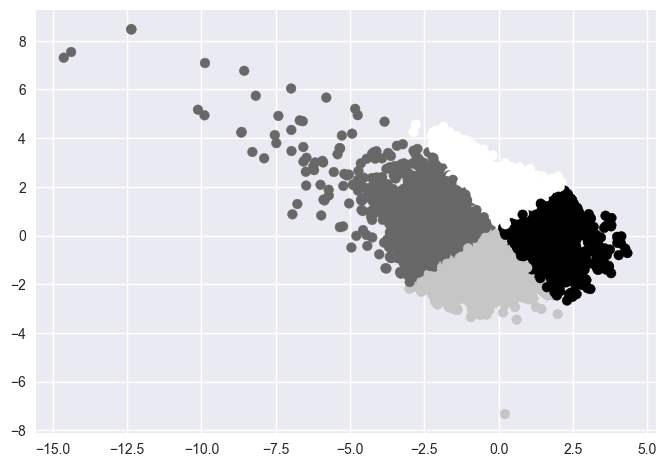


Bisecting K-Means Silhouette Score: 0.3602


In [7]:

class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.
    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        n_samples = X.shape[0]
        
        # Start with all points in cluster 0
        self.labels_ = np.zeros(n_samples, dtype=int)
        next_label = 1
        
        # Store centroid for initial cluster
        self.centers_[0] = X.mean(axis=0)
        
        # Continue splitting until we have n_clusters
        while len(np.unique(self.labels_)) < self.n_clusters:
            # Find the largest cluster to split
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            cluster_to_split = unique_labels[np.argmax(counts)]
            
            # Get points in this cluster
            mask = self.labels_ == cluster_to_split
            cluster_points = X[mask]
            
            # Split cluster into 2 using k-means
            kmeans = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            sub_labels = kmeans.fit_predict(cluster_points)
            
            # Assign new labels: keep cluster_to_split for one half, use next_label for other
            new_labels = self.labels_.copy()
            indices = np.where(mask)[0]
            
            for i, idx in enumerate(indices):
                if sub_labels[i] == 1:
                    new_labels[idx] = next_label
            
            self.labels_ = new_labels
            
            # Store split information
            self.split_tree[cluster_to_split] = (cluster_to_split, next_label)
            
            # Store centroids
            self.centers_[cluster_to_split] = kmeans.cluster_centers_[0]
            self.centers_[next_label] = kmeans.cluster_centers_[1]
            
            next_label += 1
        
        return self.labels_

# Example (for instructor use only):
bisect = BisectingKMeans(n_clusters=4)
labels = bisect.fit_predict(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.show()

# Print silhouette score
silhouette = silhouette_score(X_pca, labels)
print(f"\nBisecting K-Means Silhouette Score: {silhouette:.4f}")

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!

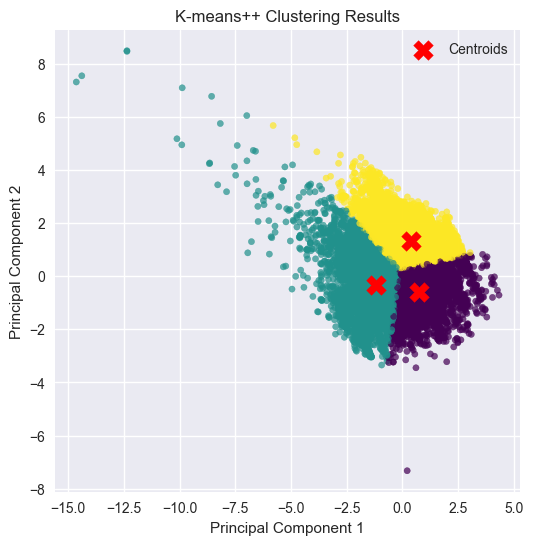

In [8]:
kmeans_pp = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels_pp = kmeans_pp.fit_predict(X_pca)

# Plot K-means++ result
plt.figure(figsize=(6,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pp, cmap='viridis', s=20, alpha=0.7)
plt.scatter(kmeans_pp.cluster_centers_[:,0], kmeans_pp.cluster_centers_[:,1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title('K-means++ Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

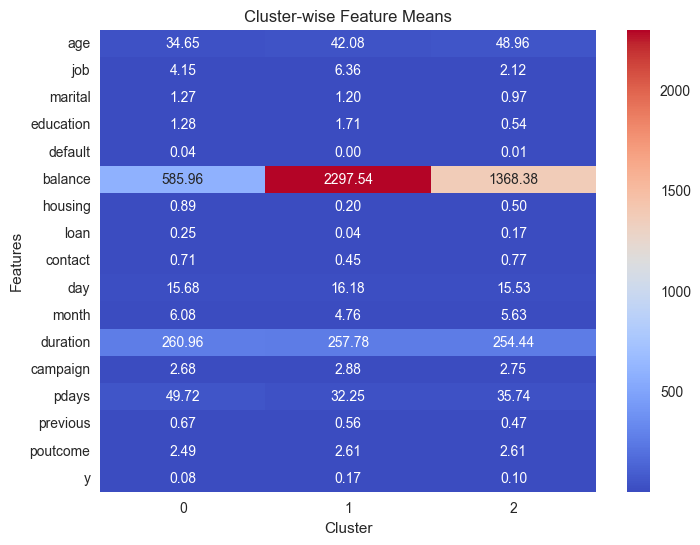

Cluster,0,1,2
age,34.647305,42.080291,48.962755
job,4.146534,6.363011,2.120924
marital,1.270418,1.201829,0.971197
education,1.281384,1.711273,0.536583
default,0.040395,0.000267,0.006456
balance,585.961369,2297.543082,1368.377669
housing,0.890334,0.199693,0.495117
loan,0.251571,0.042582,0.168929
contact,0.711011,0.449710,0.770237
day,15.679378,16.182607,15.530707


In [9]:
# bonus 2

data['Cluster'] = kmeans_pp.labels_

# Compute average values of each feature per cluster
cluster_summary = data.groupby('Cluster').mean().T

plt.figure(figsize=(8,6))
sns.heatmap(cluster_summary, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Cluster-wise Feature Means')
plt.ylabel('Features')
plt.xlabel('Cluster')
plt.show()

display(cluster_summary)

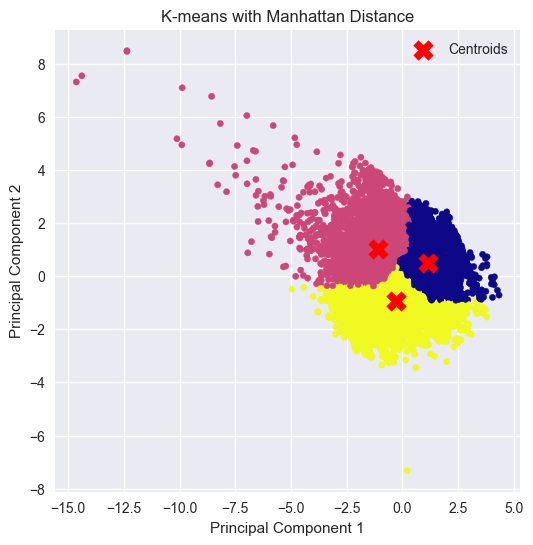

In [10]:
# bonus 3

from sklearn.metrics import pairwise_distances_argmin_min

def manhattan_kmeans(X, n_clusters=3, max_iters=100, random_state=42):
    np.random.seed(random_state)
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    
    for _ in range(max_iters):
        # Compute Manhattan distance instead of Euclidean
        distances = np.abs(X[:, np.newaxis] - centroids).sum(axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        if np.allclose(centroids, new_centroids, atol=1e-6):
            break
        centroids = new_centroids
    return labels, centroids

labels_manhattan, centroids_manhattan = manhattan_kmeans(X_pca, n_clusters=3)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_manhattan, cmap='plasma', s=20)
plt.scatter(centroids_manhattan[:,0], centroids_manhattan[:,1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means with Manhattan Distance')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Detected 1637 outliers out of 45211 points.


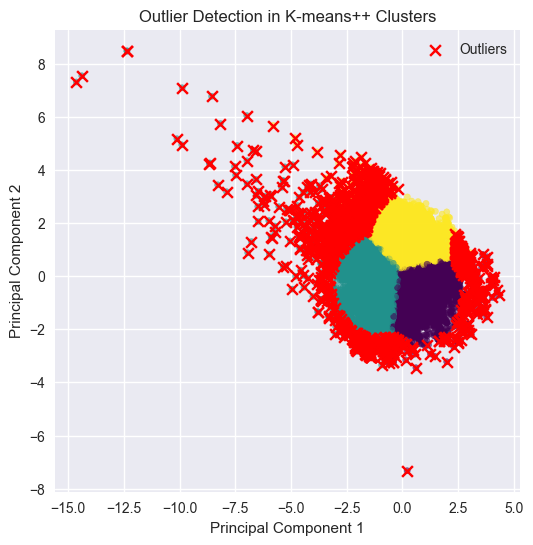

In [11]:
# bonus 4

# Use final K-means++ centroids to compute distances
distances = np.min(np.linalg.norm(X_pca[:, np.newaxis] - kmeans_pp.cluster_centers_, axis=2), axis=1)

# Define threshold as points further than 2 std deviations from their centroid
threshold = distances.mean() + 2 * distances.std()
outliers = np.where(distances > threshold)[0]

print(f"Detected {len(outliers)} outliers out of {len(X_pca)} points.")

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pp.labels_, cmap='viridis', s=20, alpha=0.6)
plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1], c='red', marker='x', s=60, label='Outliers')
plt.title('Outlier Detection in K-means++ Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

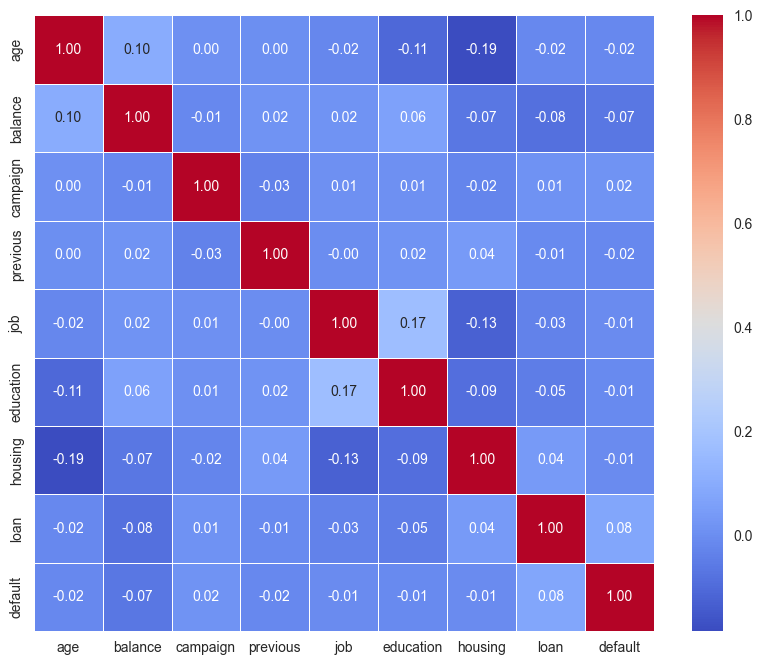

In [12]:
# corr heatmap

corr_features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
                     'housing', 'loan', 'default']

corr= data[corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.show()

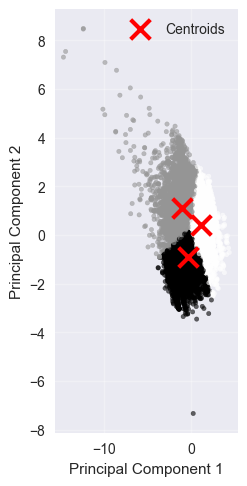

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score

kmeans = KMeansClustering(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels
centroids = kmeans.centroids

# scatter plot
ax1 = plt.subplot(1, 3, 1)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.6, s=10)
ax1.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', marker='x', s=200, linewidths=3, label='Centroids')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.show()

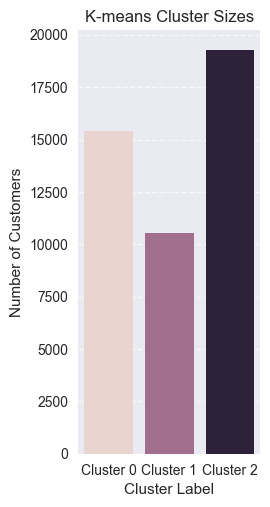

In [14]:
# bar plot
ax2 = plt.subplot(1, 3, 2)
cluster_counts = pd.Series(labels).value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax2, hue=cluster_counts.index, legend=False)
ax2.set_xlabel('Cluster Label')
ax2.set_ylabel('Number of Customers')
ax2.set_title('K-means Cluster Sizes')
ax2.set_xticks(ticks=range(len(cluster_counts.index)))
ax2.set_xticklabels([f'Cluster {i}' for i in cluster_counts.index])
ax2.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

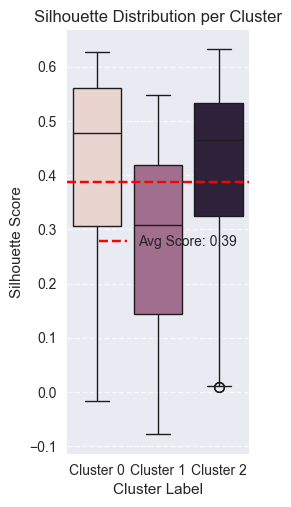

In [15]:
# silhouette box plot
ax3 = plt.subplot(1, 3, 3)
silhouette_vals = silhouette_samples(X_pca, labels)
silhouette_data = pd.DataFrame({'Cluster': labels, 'SilhouetteScore': silhouette_vals})
sns.boxplot(x='Cluster', y='SilhouetteScore', data=silhouette_data, ax=ax3, hue='Cluster', legend=False)
avg_silhouette = silhouette_score(X_pca, labels)
ax3.axhline(avg_silhouette, color='red', linestyle='--', label=f'Avg Score: {avg_silhouette:.2f}')
ax3.set_xlabel('Cluster Label')
ax3.set_ylabel('Silhouette Score')
ax3.set_title('Silhouette Distribution per Cluster')
cluster_indices = sorted(np.unique(labels))
ax3.set_xticks(ticks=range(len(cluster_indices)))
ax3.set_xticklabels([f'Cluster {i}' for i in cluster_indices])
ax3.legend()
ax3.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()